In [1]:
!pip install customtkinter matplotlib pandas

     -------------------------------------- 294.0/294.0 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 7.2 MB/s eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 161.3/161.3 kB 3.3 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.5/2.5 MB 6.9 MB/s eta 0:00:00


In [2]:
from tkinter import *
from tkinter import ttk
from customtkinter import*

import numpy as np
import matplotlib 



import pandas as pd
import time
import datetime
from collections import Counter

%matplotlib inline

In [3]:
df = pd.read_csv('specimenDate_ageDemographic-unstacked.csv')

### Total cases per specimen date

<AxesSubplot: >

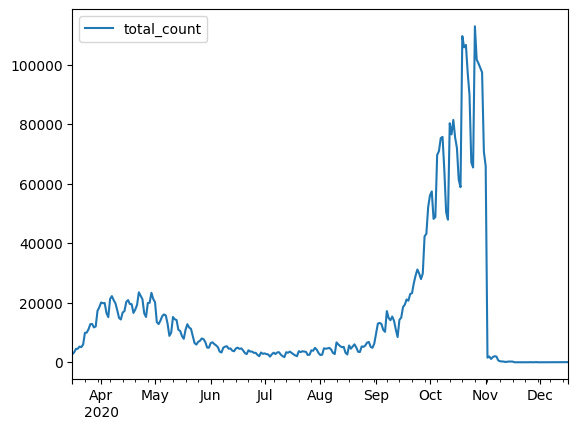

In [4]:
dates =  list(Counter(df['date']))
# given = '2020-05-11'
dict_l = []
for date in dates:
    new_df = df[df['date'] == date]
    total_cases = ['newCasesBySpecimenDate-0_59', 'newCasesBySpecimenDate-60+',]
    dict_l.append([date, sum(new_df[total_cases].sum())])

my_df = pd.DataFrame(dict_l, index=pd.date_range('2020-03-16', periods=len(dict_l)), columns=['date', 'total_count'])
my_df.plot()

## Total cases per specimen date age demographics
#### 0-59, 60+, etc

<AxesSubplot: >

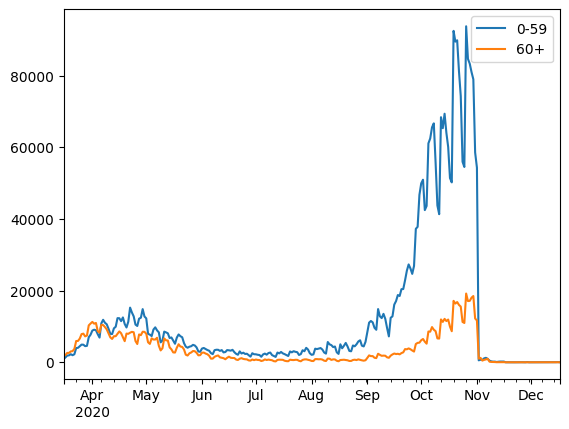

In [5]:
# for every unique date in dataframe, calculate the total cases
# given = '2020-05-11'
dict_l = []
for date in dates:
    new_df = df[df['date'] == date]
    dict_l.append([date, 
                    new_df['newCasesBySpecimenDate-0_59'].sum(), 
                    new_df['newCasesBySpecimenDate-60+'].sum()]
                )
# new_df['newCasesBySpecimenDate-0_59'].sum()
# dict_l
pd.DataFrame(dict_l, index=pd.date_range('2020-03-16', periods=len(dict_l)), columns=['date', '0-59', '60+']).plot()

## 7-day case rates by specimen date

<AxesSubplot: >

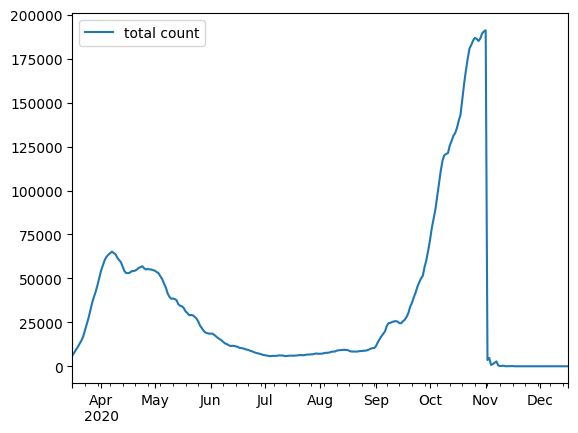

In [6]:
# for every unique date in dataframe, calculate the total cases
# given = '2020-05-11'
dict_l = []
for date in dates:
    new_df = df[df['date'] == date]
    total_cases = ['newCasesBySpecimenDateRollingRate-0_59', 'newCasesBySpecimenDateRollingRate-60+',]
    dict_l.append([date, sum(new_df[total_cases].sum())])
# new_df['newCasesBySpecimenDate-0_59'].sum()
# dict_l
pd.DataFrame(dict_l, index=pd.date_range('2020-03-16', periods=len(dict_l)), columns=['date', 'total count']).plot()

## 7-day case rates by specimen date per demographics

## 7-day case sums by specimen date

<AxesSubplot: >

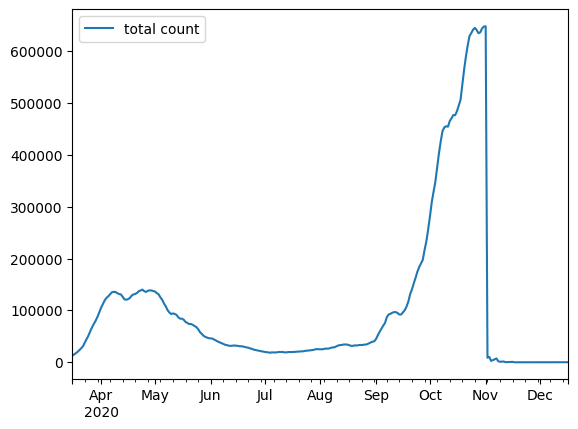

In [7]:
# for every unique date in dataframe, calculate the total cases
# given = '2020-05-11'
dict_l = []
for date in dates:
    new_df = df[df['date'] == date]
    total_cases = ['newCasesBySpecimenDateRollingSum-0_59', 'newCasesBySpecimenDateRollingSum-60+',]
    dict_l.append([date, sum(new_df[total_cases].sum())])
# new_df['newCasesBySpecimenDate-0_59'].sum()
# dict_l
pd.DataFrame(dict_l, index=pd.date_range('2020-03-16', periods=len(dict_l)), columns=['date', 'total count']).plot()

## 7-day case sum by specimen date per age demographics

<AxesSubplot: >

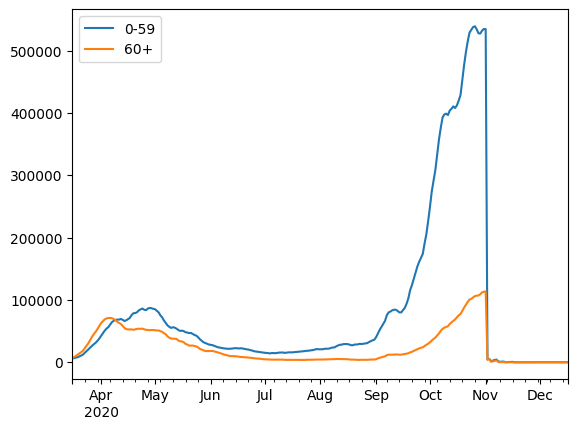

In [8]:
# for every unique date in dataframe, calculate the total cases
# given = '2020-05-11'
dict_l = []
for date in dates:
    new_df = df[df['date'] == date]
    dict_l.append([date, 
                    new_df['newCasesBySpecimenDateRollingSum-0_59'].sum(), 
                    new_df['newCasesBySpecimenDateRollingSum-60+'].sum()]
                )
# new_df['newCasesBySpecimenDate-0_59'].sum()
pd.DataFrame(dict_l, index=pd.date_range('2020-03-16', periods=len(dict_l)), columns=['date', '0-59', '60+']).plot()

In [9]:
'''
    Project GUI using customTkinter
'''
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure

df = pd.read_csv('specimenDate_ageDemographic-unstacked.csv')
dates =  list(Counter(df['date']))

charts = [['newCasesBySpecimenDate-0_59', 'newCasesBySpecimenDate-60+'], 
                        ['newCasesBySpecimenDateRollingRate-0_59', 'newCasesBySpecimenDateRollingRate-60+'],
                      ['newCasesBySpecimenDateRollingSum-0_59', 'newCasesBySpecimenDateRollingSum-60+'],]
def prepare_df(cols):
    dict_l = []
    for date in dates:
        new_df = df[df['date'] == date]
        dict_l.append([date, sum(new_df[cols].sum())])
    return pd.DataFrame(dict_l, index=pd.date_range('2020-03-16', periods=len(dict_l)), columns=['date', 'total_count'])

cases_df = prepare_df(charts[0])
rolling_df = prepare_df(charts[1])
sum_df = prepare_df(charts[2])

# force data processing
df1 = pd.read_csv('bed_element_july.csv')
df2 = pd.read_csv('bed_element_aug.csv')
df3 = pd.read_csv('bed_element_sep.csv')


ll = [ [len(df[df.gender == 'Male']), len(df[df.gender == 'Female'])] for df in [df1, df2, df3] ]
gender_df = pd.DataFrame(ll, columns=['Male', 'Female'], index=['July', 'August', 'Sept'])


# Bar graph of age range of those searched over three months

# remove rows with NaN for age range column
df1 = df1[df1.age_range.isna() == False]
df2 = df2[df2.age_range.isna() == False]
df3 = df3[df3.age_range.isna() == False]

ll = [ [ len(df[df.age_range == d]) for d in sorted(df.age_range.unique()) ] for df in [df1, df2, df3] ]
# [ [ dict_data[d] = len(df[df.age_range == d]) for d in df.age_range.unique() ] for df in [df1, df2, df3] ]
cols = sorted(df1.age_range.unique())
age_df = pd.DataFrame(ll, columns=cols, index=['July', 'August', 'Sept'])


# Bar graph of stop and search outcomes
search_df = df1.groupby('outcome').sum()
# search_df.involved_person.plot.bar()


class ICA():
    def __init__(self):
        self.fontSize = ('Arial', 20)
        self.expression = ''
        self.charts = [
            (cases_df, 'newCasesBySpecimenDate'),
            (rolling_df,'newCasesBySpecimenDateRollingRate'),
            (sum_df, 'newCasesBySpecimenDateRollingSum')
        ]
        self.count = 0
        self.force_count = 0
        
        self.convid_words = [
            'Daily numbers of new cases. Data are shown by the date the sample was taken from the person being tested.',
            'Rate per 100,000 people of the number of new cases in the rolling 7-day period ending on the dates shown. Data are shown by the date the sample was taken from the person being tested.',
            'The number of new cases within rolling 7-day periods. Data are shown by the date the sample was taken from the person being tested.']
        
        self.force_charts = [
            (gender_df, 'barh'),
            (age_df, 'bar'),
            (search_df, 'bar')
        ]
        self.force_words = [
            'Relationship between male and female search in Bedfordshire Between July and September, 2021',
            'Bar graph of age range of those searched over three months in Bedfordshire',
            'Bar graph of outcome of stop and serach in Bedfordshire for the month of July, 2021'
        ]
        
        set_appearance_mode("System")  # Modes: system (default), light, dark
        set_default_color_theme("green")  # Themes: blue (default), dark-blue, green
        

        self.root = CTk()
        label = CTkLabel(self.root, text="Data Processing and Visualization Software for Digital Innovation ", 
                      font=('Arial', 20))
        label.pack(padx=10, pady=20)
        
        selectFrame = CTkFrame(self.root)
        selectFrame.columnconfigure(0, weight=2)
        selectFrame.columnconfigure(1, weight=1)
        
        selectLabel = CTkLabel(selectFrame, text="Select Data to visualize: ", 
                      font=('Arial', 19))
        selectLabel.grid(column=0, row=0, sticky='e')
        
        self.combobox = ttk.Combobox(selectFrame, font=self.fontSize,)
        self.combobox['values'] = ('Convid-19', 'Stop and earch')
        self.combobox.grid(column=1, row=0, sticky='nsew', padx=20)
        self.combobox.bind('<<ComboboxSelected>>', self.changeFrame)
        selectFrame.pack(fill='x', pady=30)
        
        
        # frame for all convid-19 data
        self.addConvidFrame(self.root)
        
        # frame for all stop and serach data
        self.addForceFrame(self.root)
        
        
        
        #getting screen width and height of display
        width= self.root.winfo_screenwidth()
        height= self.root.winfo_screenheight()
        #setting tkinter window size
        self.root.geometry("%dx%d" % (width, height))
        
        self.root.title('ICA2 Solution')
        
        self.root.mainloop()
        
    def addWords(self):
        text = self.convid_words[abs(self.count)]
        self.graphLabel.configure(text=text)
#         print(text)
    
    def addForceWords(self):
        text = self.force_words[abs(self.force_count)]
        self.forceGraphLabel.configure(text=text)
#         print(text)
        
    def addConvidFrame(self, master):
        fontSize = self.fontSize
        self.convid = CTkFrame(master)        
        self.graphFrame = CTkFrame(self.convid)
        self.graphFrame.columnconfigure(0, weight=1)
        self.graphFrame.columnconfigure(1, weight=10)
        self.graphFrame.columnconfigure(2, weight=1)
        
        # previous button
        previousButton = CTkButton(self.graphFrame, text='<-', font=fontSize, command=self.load_previous)
        previousButton.grid(row=0, column=0,)
         
        # graph frame
        self.actualGraphFrame = CTkFrame(self.graphFrame)
        self.actualGraphFrame.grid(row=0, column=1, sticky='news')
        
        self.draw_chart(self.charts[0], self.actualGraphFrame)
        
        # next button
        nextButton = CTkButton(self.graphFrame, text='->', font=fontSize, command=self.load_next)
        nextButton.grid(row=0, column=2,)
        
        self.graphFrame.pack(fill=BOTH)
        
        self.graphLabel = CTkLabel(self.convid, text='', font=fontSize)
        self.graphLabel.pack(padx=10, pady=10, fill=BOTH)
        
        self.addWords()
    
    def addForceFrame(self, master):
        fontSize = self.fontSize
        self.search = CTkFrame(master)        
        self.forceGraphFrame = CTkFrame(self.search)
        self.forceGraphFrame.columnconfigure(0, weight=1)
        self.forceGraphFrame.columnconfigure(1, weight=10)
        self.forceGraphFrame.columnconfigure(2, weight=1)
        
        # previous button
        previousButton = CTkButton(self.forceGraphFrame, text='<-', font=fontSize, command=self.load_previous_force)
        previousButton.grid(row=0, column=0,)
         
        # graph frame
        self.actualForceGraphFrame = CTkFrame(self.forceGraphFrame)
        self.actualForceGraphFrame.grid(row=0, column=1, sticky='news')
        
        self.draw_chart_force(self.force_charts[0], self.force_words[0], self.actualForceGraphFrame)
        
        # next button
        nextButton = CTkButton(self.forceGraphFrame, text='->', font=fontSize, command=self.load_next_force)
        nextButton.grid(row=0, column=2,)
        
        self.forceGraphFrame.pack(fill=BOTH)
        
        self.forceGraphLabel = CTkLabel(self.search, text='', font=fontSize)
        self.forceGraphLabel.pack(padx=10, pady=10, fill=BOTH)
        
        self.addForceWords()
        
    def draw_chart(self, data, master):
        
        master.destroy()
        
        master = CTkFrame(self.graphFrame)
        figure = Figure(figsize=(5,5), dpi=100)
        chart = figure.add_subplot(111)
        data[0].plot(ax=chart, title=data[1])
        canvas = FigureCanvasTkAgg(figure, master)
        canvas.get_tk_widget().pack(side=TOP, fill=BOTH, expand=True, )
        
#         add navigation 
        navigation = NavigationToolbar2Tk(canvas, master)
        navigation.update()
        canvas._tkcanvas.pack(side=TOP, fill=BOTH, expand=True)
        master.grid(row=0, column=1, sticky='news')
        
    
    def draw_chart_force(self, df, title, master):
        
        master.destroy()
        
        master = CTkFrame(self.forceGraphFrame)
        figure = Figure(figsize=(5,5), dpi=100)
        chart = figure.add_subplot(111)
        df[0].plot(ax=chart, title=title, kind=df[1])
        canvas = FigureCanvasTkAgg(figure, master)
        canvas.get_tk_widget().pack(side=TOP, fill=BOTH, expand=True, )
        
#         add navigation 
        navigation = NavigationToolbar2Tk(canvas, master)
        navigation.update()
        canvas._tkcanvas.pack(side=TOP, fill=BOTH, expand=True)
        master.grid(row=0, column=1, sticky='news')
        
        
    def changeFrame(self, event):
#         print(self.combobox.get())
        if 'Stop and earch' == self.combobox.get():
            self.convid.pack_forget()
            self.search.pack(fill=BOTH)
            
        elif 'Convid-19' == self.combobox.get():
            self.search.pack_forget()
            self.convid.pack(fill=BOTH)
            
    def load_next(self):
        if self.count > 2:
            self.count = 0
        self.count += 1
        self.draw_chart(self.charts[self.count], self.actualGraphFrame)
        self.addWords()
        
    def load_next_force(self):
        if self.force_count > 2:
            self.force_count = 0
        self.draw_chart_force(self.force_charts[self.force_count], self.force_words[self.force_count], self.actualForceGraphFrame)
        self.addForceWords()
        self.force_count += 1
        
    def load_previous(self):
#         print('previous')
        if self.count < -3:
            self.count = 0
        self.draw_chart(self.charts[self.count], self.actualGraphFrame)
        self.addWords()
        self.count -= 1
        
    def load_previous_force(self):
#         print('previous')
        if self.force_count < -3:
            self.force_count = 0
        self.draw_chart_force(self.force_charts[self.force_count], self.force_words[self.force_count], self.actualForceGraphFrame)
        self.addForceWords()
        self.count -= 1

C:\Users\joyma\AppData\Local\Temp\ipykernel_15704\983650354.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  search_df = df1.groupby('outcome').sum()


In [ ]:
ICA()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\joyma\anaconda3\envs\QL\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\joyma\anaconda3\envs\QL\lib\site-packages\customtkinter\windows\widgets\ctk_button.py", line 531, in _clicked
    self._command()
  File "C:\Users\joyma\AppData\Local\Temp\ipykernel_15704\983650354.py", line 240, in load_next
    self.draw_chart(self.charts[self.count], self.actualGraphFrame)
IndexError: list index out of range
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\joyma\anaconda3\envs\QL\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\joyma\anaconda3\envs\QL\lib\site-packages\customtkinter\windows\widgets\ctk_button.py", line 531, in _clicked
    self._command()
  File "C:\Users\joyma\AppData\Local\Temp\ipykernel_15704\983650354.py", line 240, in load_next
    self.draw_chart(self.charts[self.count],